In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('heart disease classification dataset.csv')
df = pd.DataFrame(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df = df.dropna()

In [11]:
df = pd.get_dummies(df,columns=['sex' ,'target' ],drop_first=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         293 non-null    int64  
 1   cp          293 non-null    int64  
 2   trestbps    293 non-null    float64
 3   chol        293 non-null    float64
 4   fbs         293 non-null    int64  
 5   restecg     293 non-null    int64  
 6   thalach     293 non-null    float64
 7   exang       293 non-null    int64  
 8   oldpeak     293 non-null    float64
 9   slope       293 non-null    int64  
 10  ca          293 non-null    int64  
 11  thal        293 non-null    int64  
 12  sex_male    293 non-null    uint8  
 13  target_yes  293 non-null    uint8  
dtypes: float64(4), int64(8), uint8(2)
memory usage: 30.3 KB


In [12]:
X = df.drop("target_yes",axis=1)
y = df["target_yes"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
grd_model = GradientBoostingClassifier(n_estimators=1000 ,max_depth=1 ,learning_rate=0.02)

In [16]:
grd_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix ,mean_squared_error
accuracy_score(y_test , grd_model.predict(X_test))

0.8813559322033898

In [21]:
accuracy_score(y_train , grd_model.predict(X_train)) 

0.8846153846153846

In [30]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(learning_rate = 0.02 , n_estimators=5000)

In [31]:
ada_clf1 = AdaBoostClassifier(learning_rate = 0.02 , n_estimators=500)

In [32]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [33]:
ada_clf1.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=500)

In [34]:
accuracy_score(y_test , ada_clf.predict(X_test)) 

0.864406779661017

In [35]:
accuracy_score(y_test , ada_clf1.predict(X_test))

0.864406779661017

In [36]:
import xgboost as xgb

In [37]:
xgb_clf = xgb.XGBClassifier(max_depth = 5,n_estimators=10000 , learning_rate=0.3 , n_jobs=-1)

In [38]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [39]:
accuracy_score(y_test , xgb_clf.predict(X_test))

0.8305084745762712

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

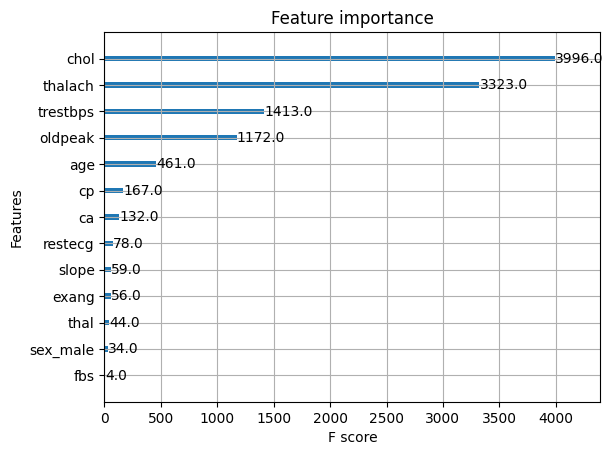

In [40]:
xgb.plot_importance(xgb_clf)